# **Project 9: Reinforcement Learning**

Importing the necessary libraries in different cells

In [34]:
!pip -q install swig

In [35]:
!pip -q install "gymnasium[box2d]"

In [36]:
!pip -q install renderlab

Checking if everything is OK

In [37]:
import gymnasium as gym
import renderlab
print("OK")

OK


Explaining what those functions do based on gymnasium documentation:

The reset() function starts a new episode by resetting the environment to its initial state. It returns the initial observation so the agent can begin interacting with the environment from the start.

The step(action) function applies the selected action to the environment and moves it one step forward. It returns the new observation, a reward, and information about whether the episode has ended.

The render() function displays the environment and shows how the agent interacts with it. It is mainly used to visualize and understand the agent’s behavior.

Describing the environment of LunaLander-v3 based on the gymansium documentation:

a. The observation space shows the current state of the lander. It includes information about its position, speed, angle, and whether the legs are touching the ground. This data helps the agent understand what is happening in the environment.

b. The action space has four possible actions. The agent can choose to do nothing, use the left engine, use the main engine, or use the right engine. One action is selected at each step.

c. The reward function helps the agent learn how to land correctly. The agent gets positive rewards for landing safely and negative rewards for crashing or wasting fuel. Small rewards and penalties depend on movement, angle, and leg contact.

Creating a random agent and using the renderlab library

In [38]:
import gymnasium as gym
import renderlab as rl

env = gym.make("LunarLander-v3", render_mode="rgb_array")

env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Evaluating a random agent for 5 episodes in LunarLander-v3 and computing the mean episode retur aka the average total reward per episode.

In [39]:
import gymnasium as gym
import numpy as np

env = gym.make("LunarLander-v3")

episode_returns = []

for ep in range(5):
    observation, info = env.reset()
    done = False
    total_reward = 0.0

    while not done:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        done = terminated or truncated

    episode_returns.append(total_reward)
    print(f"Episode {ep+1} return: {total_reward:.2f}")

env.close()

Episode 1 return: -111.02
Episode 2 return: -155.05
Episode 3 return: -261.07
Episode 4 return: -173.19
Episode 5 return: -140.38


In [40]:
import numpy as np
mean_return = np.mean(episode_returns)
print(mean_return)

-168.14185340056073


So, what we get from above is that a random policy performs poorly in the LunarLander environment. More specifically, the episode returns were mostly negative, and the mean return over the 5 episodes was −152.76.

# **Training with Stable Baselines (DQN & PPO)**

In [41]:
!pip install stable-baselines3

In [42]:
import gymnasium as gym
from stable_baselines3 import DQN

In [43]:
from stable_baselines3.common.callbacks import BaseCallback

class RewardCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []
        self._current_reward = 0.0

    def _on_step(self) -> bool:
        self._current_reward += float(self.locals["rewards"][0])

        if bool(self.locals["dones"][0]):
            self.episode_rewards.append(self._current_reward)
            self._current_reward = 0.0

        return True

In [44]:
env = gym.make("LunarLander-v3")

In [45]:
import time
import gymnasium as gym
from stable_baselines3 import DQN

dqn_env = gym.make("LunarLander-v3")

dqn_callback = RewardCallback()

start = time.time()

dqn_model = DQN(
    policy="MlpPolicy",
    env=dqn_env,
    verbose=1
)

dqn_model.learn(total_timesteps=50_000, callback=dqn_callback)

dqn_train_time = time.time() - start
dqn_rewards = dqn_callback.episode_rewards

print(f"DQN training time in seconds: {dqn_train_time:.2f}")
print(f"DQN episodes recorded during training: {len(dqn_rewards)}")

dqn_env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.2     |
|    ep_rew_mean      | -120     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1329     |
|    time_elapsed     | 0        |
|    total_timesteps  | 353      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 63       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.6     |
|    ep_rew_mean      | -212     |
|    exploration_rate | 0.858    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 944      |
|    time_elapsed     | 0        |
|    total_timesteps  | 749      |
| train/              |        

PPO train

In [46]:
import time
import gymnasium as gym
from stable_baselines3 import PPO

ppo_env = gym.make("LunarLander-v3")

ppo_callback = RewardCallback()

start = time.time()

ppo_model = PPO(
    policy="MlpPolicy",
    env=ppo_env,
    verbose=1
)

ppo_model.learn(total_timesteps=50_000, callback=ppo_callback)

ppo_train_time = time.time() - start
ppo_rewards = ppo_callback.episode_rewards

print(f"PPO training time in seconds is: {ppo_train_time:.2f}")
print(f"PPO episodes recorded during training: {len(ppo_rewards)}")

ppo_env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.6     |
|    ep_rew_mean     | -188     |
| time/              |          |
|    fps             | 726      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 93          |
|    ep_rew_mean          | -160        |
| time/                   |             |
|    fps                  | 434         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007726174 |
|    clip_fraction        | 0.0555      |
|    clip_range           | 0.2         |
|    entropy_loss   

Evaluating PPO and DQN mean reward

In [47]:
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy

def mean_5_episodes(model):
    eval_env = gym.make("LunarLander-v3")
    mean_reward, _ = evaluate_policy(model, eval_env, n_eval_episodes=5, deterministic=True)
    eval_env.close()
    return mean_reward

dqn_mean = mean_5_episodes(dqn_model)
ppo_mean = mean_5_episodes(ppo_model)

print(f"DQN mean reward over 5 episodes is: {dqn_mean:.2f}")
print(f"PPO mean reward over 5 episodes is: {ppo_mean:.2f}")

DQN mean reward over 5 episodes is: -65.84
PPO mean reward over 5 episodes is: -547.25


From the above we can understand that DQN achieved better performance than PPO in the LunarLander-v3 environment with the same training steps.
PPO showed poor results, indicating the need for more training or parameter tuning.

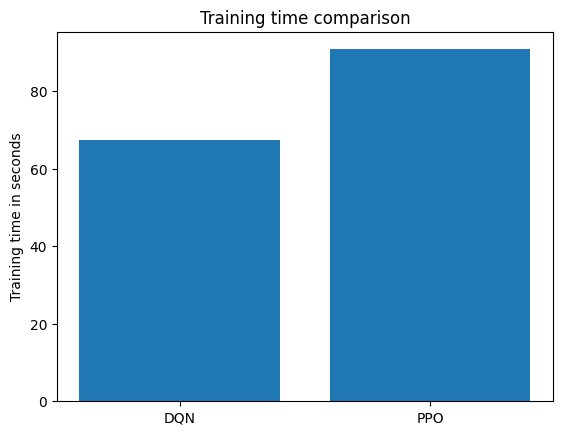

In [48]:
import matplotlib.pyplot as plt

algos = ["DQN", "PPO"]
times = [dqn_train_time, ppo_train_time]

plt.figure()
plt.bar(algos, times)
plt.ylabel("Training time in seconds")
plt.title("Training time comparison")
plt.show()

Conclusion from above:

PPO took longer to train than DQN for the same number of training steps.

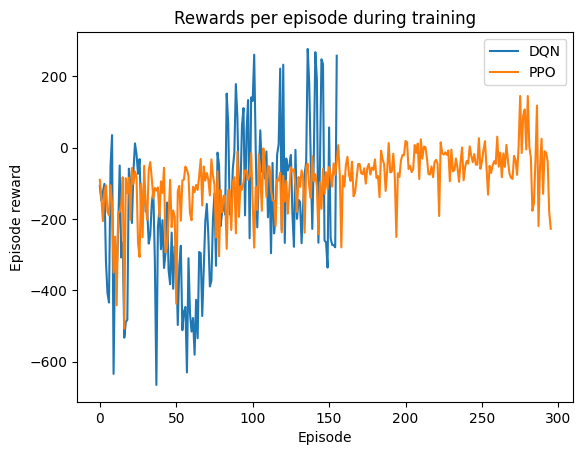

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(dqn_rewards, label="DQN")
plt.plot(ppo_rewards, label="PPO")
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.title("Rewards per episode during training")
plt.legend()
plt.show()

From the above we conclude that the figure shows the episode rewards during training for DQN and PPO. DQN exhibits high variance with occasional high rewards, while PPO shows smoother but overall lower performance with the selected hyperparameters.

So, now we are moving on to tuned trainings based on the appropriate hypermeters found online

In [50]:
from stable_baselines3.common.callbacks import BaseCallback

class RewardCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []
        self._current_reward = 0.0

    def _on_step(self) -> bool:
        self._current_reward += float(self.locals["rewards"][0])

        if bool(self.locals["dones"][0]):
            self.episode_rewards.append(self._current_reward)
            self._current_reward = 0.0

        return True

In [51]:
import time
import gymnasium as gym
from stable_baselines3 import DQN

env = gym.make("LunarLander-v3")
dqn_cb = RewardCallback()

start = time.time()

dqn_tuned = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-4,
    buffer_size=100_000,
    learning_starts=1_000,
    batch_size=64,
    gamma=0.99,
    exploration_fraction=0.2,
    exploration_final_eps=0.01,
    target_update_interval=1_000,
    verbose=0
)

dqn_tuned.learn(total_timesteps=200_000, callback=dqn_cb)

dqn_tuned_time = time.time() - start
dqn_tuned_rewards = dqn_cb.episode_rewards

env.close()

print(f"Tuned DQN episodes collected during training: {len(dqn_tuned_rewards)}")

Tuned DQN episodes collected during training: 367


In [52]:
import time
import gymnasium as gym
from stable_baselines3 import PPO

env = gym.make("LunarLander-v3")
ppo_cb = RewardCallback()

start = time.time()

ppo_tuned = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    verbose=0
)

ppo_tuned.learn(total_timesteps=300_000, callback=ppo_cb)

ppo_tuned_time = time.time() - start
ppo_tuned_rewards = ppo_cb.episode_rewards

env.close()

print(f"Tuned PPO episodes collected during training: {len(ppo_tuned_rewards)}")

Tuned PPO episodes collected during training: 699


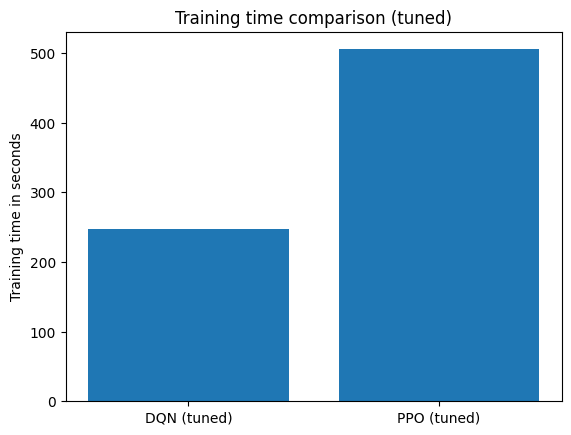

In [53]:
import matplotlib.pyplot as plt

algos = ["DQN (tuned)", "PPO (tuned)"]
times = [dqn_tuned_time, ppo_tuned_time]

plt.figure()
plt.bar(algos, times)
plt.ylabel("Training time in seconds")
plt.title("Training time comparison (tuned)")
plt.show()

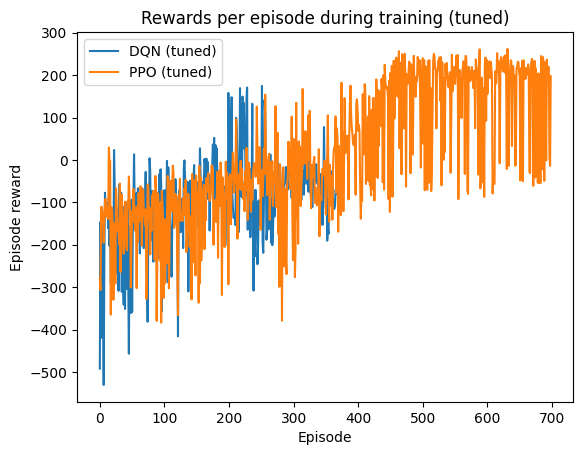

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(dqn_tuned_rewards, label="DQN (tuned)")
plt.plot(ppo_tuned_rewards, label="PPO (tuned)")
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.title("Rewards per episode during training (tuned)")
plt.legend()
plt.show()

From the above we conclude that with tuned hyperparameters, PPO achieves higher and more stable rewards than DQN during training.